<a href="https://colab.research.google.com/github/patricktapajos/pos-ciencia-dados/blob/master/mod03-estatistica/estatistica_trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Estatística de Dados de Casas para Alugar**

# 1. Apresentação



### Resumo
Este documento tem o objetivo de apresentar uma análise estatística de [...] para extrair e visualizar informações úteis com o intuito de [...].



### Autores
Alunos de pós-graduação em Ciência de Dados da Universidade do Estado do Amazonas:
1.   [Patrick Tapajós Pinto](https://www.linkedin.com/in/patrick-tapajos-pinto/)
2.   [Wladimir Barroso Guedes de Araújo Neto](https://www.linkedin.com/in/wladneto/)


### Ferramentas Utilizadas
A análise foi efetuada utilizando-se a linguagem de programação **Python** e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados.

# 2. Coleta de Dados


Os dados foram obtidos no [Kaggle](https://www.kaggle.com), uma rede social do cientistas de dados.


Link para download dos dados: - [https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent).

# 3. Importação de Bibliotecas

É necessário utilizar algumas bibliotecas para dar suporte à nossa análise. 
Vamos importá-las.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 4.  Importação dos Dados

Para armazenar os arquivos baixados, se faz necessário montar o diretório (Google Drive).

In [2]:
# Montagem do drive, para acesso aos arquivos baixados
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Para baixar os dados do kaggle, é necessário ter uma conta. Caso não tenha, você pode acessar https://www.kaggle.com e criar.

Após isso, basta acessar seus dados e gerar uma API Key.

1. Acesse sua conta no kaggle;
2. Clique na sua foto, no canto superior direito, para visualizar um menu como o apresentado na imagem abaixo: 

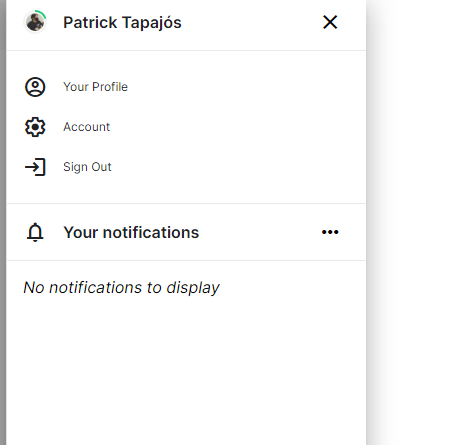

3. Clique em Account;
4. Vá até o Tópico "API" e clique em "Create New API Token". A imagem a seguir apresenta o tópico e o botão:

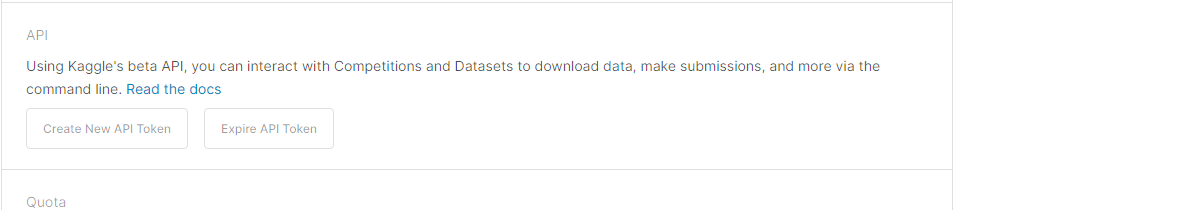

5. Baixe o arquivo;
6. Faça o upload deste arquivo para o seu Drive no Google.

In [12]:
# https://www.kaggle.com/michau96/when-brazilian-students-drink-beer
# Download da base de dados no armazenando na sessão do colab
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive"
!kaggle datasets download -d rubenssjr/brasilian-houses-to-rent
!unzip \*.zip  && rm *.zip

  0% 0.00/282k [00:00<?, ?B/s]
100% 282k/282k [00:00<00:00, 75.2MB/s]
Archive:  brasilian-houses-to-rent.zip
replace houses_to_rent.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace houses_to_rent_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [6]:
# Criando dataframe a apartir do arquivo csv baixado.
df_houses = pd.read_csv('/content/houses_to_rent_v2.csv', decimal=',')
df_houses

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
